# Assignment 3

    Q1  

    Question:  
    Provide brief definitions for the following concepts related to network and graph theory:

    i. Augmenting Path  
    ii. Residual Graph  
    iii. Dijkstra's Algorithm  
    iv. Bipartite Graph  
    v. Flow Conservation  
    vi. Ford-Fulkerson Algorithm  

Answer:  
i. Augmenting Path  
An augmenting path is a simple path from source to sink which do not include any cycles and that pass only through positive weighted edges. An augmenting path in a network flow problem is a path from the source to the sink along which additional flow can be sent, increasing the total flow in the network. Augmenting paths are used in algorithms like the Ford-Fulkerson method to find the maximum flow in a flow network.

ii. Residual Graph  
The residual graph in a network flow problem is a graph that represents the available capacity for additional flow on each edge. If there is a path from source to sink in residual graph, then it is possible to add flow. It is used in algorithms like the Ford-Fulkerson method to keep track of unused capacity and guide the flow augmentation process.

iii. Dijkstra's Algorithm  
Dijkstra's algorithm is a shortest path algorithm that finds the shortest path from a source vertex to all other vertices in a weighted graph, where edge weights are non-negative. It is widely used in applications such as finding the shortest route in maps or optimizing network routing. This is asymptotically the fastest known single-source shortest-path algorithm for arbitrary directed graphs with unbounded non-negative weights.  

iv. Bipartite Graph  
A Bipartite Graph is a graph whose vertices can be divided into two disjoint sets such that there are no edges connecting vertices within the same set. It's often used to represent relationships between two different types of objects. Equivalently, a bipartite graph is a graph that does not contain any odd-length cycles.

v. Flow Conservation  
Flow conservation is a fundamental principle in network flow problems. It states that for any intermediate vertex in the network (excluding the source and sink), the total incoming flow must be equal to the total outgoing flow, ensuring that no flow is created or lost within the network. More formally, the incoming flow is the same as the outgoing flow, or, the net flow is 0.

vi. Ford-Fulkerson Algorithm  
The Ford-Fulkerson algorithm is an iterative method used to find the maximum flow in a flow network. It repeatedly augments the flow along augmenting paths in the residual graph until no more augmenting paths can be found. It can handle networks with both positive and negative edge capacities, and is also able to detect negative sum cycles in any given flow network. It uses depth-first search to find augmenting paths from source to sink, but is often used in combination with the Edmonds-Karp algorithm, which employs breadth-first search to find augmenting paths. 


    Q2

    Use the Bellman-Ford algorithm to find the shortest path from node A to G in the weighted directed graph below. Show your work.

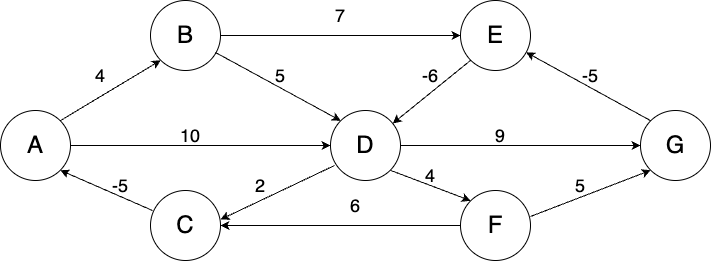


Solution:

Since there are negative edges in this graph, we cannot use Dijkstra's algorithm to find the shortest path. However, we can use Bellman-Ford as it is able to handle negative edge weights. In addition, as we can see visually, there is a negative edge cycle in the above graph at G->E->D->G, which this algorithm is able to detect.

Pseudocode:

Create adjacency list adj of residual graph from the original graph and initialize it with the edges and weights of the original graph above. 

Also create an array dist containing the distances from A to every other node in the graph, and the predecessor for each node.  
Let us initialize the distance values in dist to infinity, except for A, which we initialize to 0 (Since the distance from A to A is 0).  
We will also initialize the predecessors to None.  

```python
# we will run the loop n times because we otherwise cannot guarantee that we will find any negative cycles
for n from 0 to |V| - 1:
    for each vertex in graph:
        for each edge in vertex:
            if dist[destination of edge] > dist[vertex] + weight of edge:
                dist[destination of edge] = dist[vertex] + weight of edge
                predecessor of destination of edge = vertex
    if no changes detected in dist after an iteration:
        # shortest paths found. can exit algorithm now
    if changes detected in dist after nth iteration:
        # negative cycle found. can exit algorithm now

# array dist contains shortest paths from A to each vertex (unless negative cycle is found)
```

States of dist array containing distances shown printed out by code below-

In [45]:
adj = {
    'A':{'B':4,'D':10},
    'B':{'D':5,'E':7},
    'C':{'A':-5},
    'D':{'C':2,'F':4,'G':9},
    'E':{'D':-6},
    'F':{'C':6,'G':5},
    'G':{'E':-5}
}

dist = {'A':[float('inf'),None],'B':[float('inf'),None],'C':[float('inf'),None],'D':[float('inf'),None],'E':[float('inf'),None],'F':[float('inf'),None],'G':[float('inf'),None]}

dist['A'][0] = 0
# dist['A'][1] = 'A'
# print(dist)
print("Distances before any iterations:",dist)

for n in range(len(adj)):
    edited = False
    for i in adj:
        for j in adj[i]:
            # print(j)
            if(dist[j][0]>dist[i][0]+adj[i][j]):
                dist[j][0]=dist[i][0]+adj[i][j]
                dist[j][1]=i
                edited = True
    print("Distances after iteration",n+1,":",dist)
    if edited == False:
        print("No changes in distances after",n+1,"th iteration. Exiting algorithm with correct shortest paths and predecessors in dist")
        break
    if n == len(adj)-1:
        print("Negative cycle detected! Exiting algorithm as finding shortest paths not possible")
        break

print(dist)

Distances before any iterations: {'A': [0, None], 'B': [inf, None], 'C': [inf, None], 'D': [inf, None], 'E': [inf, None], 'F': [inf, None], 'G': [inf, None]}
Distances after iteration 1 : {'A': [0, None], 'B': [4, 'A'], 'C': [11, 'D'], 'D': [5, 'E'], 'E': [11, 'B'], 'F': [13, 'D'], 'G': [18, 'D']}
Distances after iteration 2 : {'A': [0, None], 'B': [4, 'A'], 'C': [7, 'D'], 'D': [5, 'E'], 'E': [9, 'G'], 'F': [9, 'D'], 'G': [14, 'D']}
Distances after iteration 3 : {'A': [0, None], 'B': [4, 'A'], 'C': [7, 'D'], 'D': [3, 'E'], 'E': [9, 'G'], 'F': [9, 'D'], 'G': [14, 'D']}
Distances after iteration 4 : {'A': [0, None], 'B': [4, 'A'], 'C': [5, 'D'], 'D': [3, 'E'], 'E': [7, 'G'], 'F': [7, 'D'], 'G': [12, 'D']}
Distances after iteration 5 : {'A': [0, None], 'B': [4, 'A'], 'C': [5, 'D'], 'D': [1, 'E'], 'E': [7, 'G'], 'F': [7, 'D'], 'G': [12, 'D']}
Distances after iteration 6 : {'A': [0, None], 'B': [4, 'A'], 'C': [3, 'D'], 'D': [1, 'E'], 'E': [5, 'G'], 'F': [5, 'D'], 'G': [10, 'D']}
Distances a

    Q3

    Use the Ford-Fulkerson algorithm to find the maximum flow from node A to E in the weighted directed graph above. Show your work.

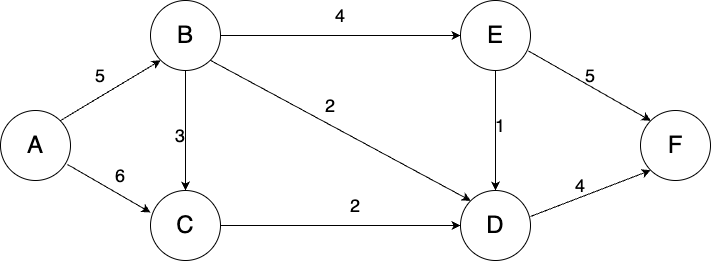

Solution:

Pseudocode:
```python
maxflow = 0
while there is an augmenting path from A to G:
    minflow = minimum capacity of all edges in augmenting path
    maxflow + minflow
    for all edges in augmenting path:
        remove capacity of minflow from edge
        add capacity of minflow in the reverse edge
print maxflow
```

Execution:

Augmenting Path 1- A->B->C->D->F with minimum capacity 2  
Augmenting Path 2- A->B->D->F with minimum capacity 2  
Augmenting Path 3- A->B->E->F with minimum capacity 1  
Augmenting Path 4- A->C->B->E->F with minimum capacity 2  

Sum of all minimum capacities (minflows) = 2 + 2 + 1 + 2 = 7  

Maxflow = 7

In [46]:
# building residual graph
arr = {'A':{'A':0,'B':5,'C':6,'D':0,'E':0,'F':0},
       'B':{'A':0,'B':0,'C':3,'D':2,'E':4,'F':0},
       'C':{'A':0,'B':0,'C':0,'D':2,'E':0,'F':0},
       'D':{'A':0,'B':0,'C':0,'D':0,'E':0,'F':4},
       'E':{'A':0,'B':0,'C':0,'D':1,'E':0,'F':5},
       'F':{'A':0,'B':0,'C':0,'D':0,'E':0,'F':0}}

visited = {'A': False, 'B': False, 'C': False, 'D': False, 'E': False, 'F': False}

def dfs(V,e):
    if V == 'F':
        print("F found while executing dfs!")
        return [V], e
    for vertex in arr[V]:
        # print(arr[V][edge])
        if arr[V][vertex] > 0 and visited[vertex] == False:
            visited[vertex] = True
            val,e1 = dfs(vertex,arr[V][vertex])
            if val != None:
                val.insert(0,V)
                return val,min(e,e1)
        # if no way forward found
        if vertex == 'F':
            return None,e

maxflow = 0
path,minflow = dfs('A',float('inf'))

while(path != None):
    print(path)
    maxflow += minflow
    while len(path)>=2:
        src = path[0]
        dest = path[1]
        path.pop(0)
        arr[src][dest] -= minflow
        arr[dest][src] += minflow

    # reset visited
    for vertex in visited:
        visited[vertex] = False
    path, minflow = dfs('A',float('inf'))
else:
    print("No more paths found to F!")

print("Max Flow:", maxflow)

F found while executing dfs!
['A', 'B', 'C', 'D', 'F']
F found while executing dfs!
['A', 'B', 'D', 'F']
F found while executing dfs!
['A', 'B', 'E', 'F']
F found while executing dfs!
['A', 'C', 'B', 'E', 'F']
No more paths found to F!
Max Flow: 7


    Q4

    Use the Preflow-Push (Push–relabel) maximum flow algorithm to find the maximum flow from node A to E in the weighted directed graph above. Show your work.

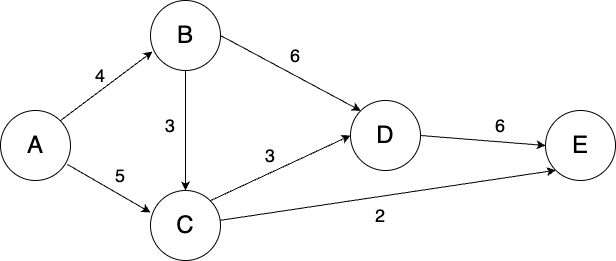

Solution:

1. Set all node heights to zero, except for A, which should be |V|.
2. f(e) = ce for all e = (s, v) and f(e) = 0 for all other edges
3. Now push and relabel while there are nodes with excess ef(v) > 0, other than the source or sink.

Initialize:  

Set all node heights to zero, except for A=5  
A: Relabel -> {A, h = 5}  
A-B: Push -> {A-B, f(e(A-B)) = 4, ef(B) = 4}  
A-C: Push -> {A-C, f(e(A-C)) = 5, ef(C) = 5}  

End initialize  

B: Relabel -> {B, h = 1}  
ef(B) = 4  
B-D: Push -> {B-D, f(e(B-D)) = 4, ef(B) = 0, ef(D) = 4}  

C: Relabel -> {C, h = 1}  
ef(C) = 5  
C-E: Push -> {C-E, f(e(C-E)) = 2, ef(C) = 3, ef(E) = 2}  
C-D: Push -> {C-D, f(e(C-D)) = 3, ef(C) = 0, ef(D) = 7}  

D: Relabel -> {D, h = 1}  
ef(D) = 7  
D-E: Push -> {D-E, f(e(D-E)) = 6, ef(D) = 1, ef(E) = 8}  
  
D: Relabel -> {D, h = 2}  
ef(D) = 1  
B-D: Push -> {B-D, f(e(B-D)) = -1, ef(B) = 1, ef(D) = 0}  

.  
.  
.  

B: Relabel -> {B, h = 6}  
ef(B) = 1  
A-B: Push -> {A-B, f(e(A-B)) = -1, ef(B) = 0}  

There are no remaining nodes with excess flow, hence we can end this algorithm  
Max flow is equal to ef(E) which is 8  

Therefore, the max flow from A to E is 8  


    Q5

    i) Network Flow Application Problem - Theory

A shipping company needs to transport different types of goods using a fleet of trucks. Each type of goods can be carried by multiple trucks, and each truck has a maximum weight limit. Additionally, each type of goods has a specified quantity that should be transported, but this quantity represents the upper limit of what should be transported. How can this logistics problem be represented as a maximum flow problem, and what would be the key components in this representation?

Solution:
To model this logistics problem as a maximum flow problem, you can construct a directed graph with specific components:

Source Node (S): This represents the source of goods that need to be transported.

Sink Node (T): This represents the destination where the goods are delivered.

Nodes for Cargo Types: Each type of cargo corresponds to a node in the graph.

Nodes for Trucks: Each truck available for transportation is represented as a separate node.

Edges:

Connect the source (S) to the nodes representing cargo types. The weight on each of these edges corresponds to the desired quantity of goods to be transported.  
Connect the nodes representing cargo types to the nodes representing trucks. These edges signify that a particular type of goods can be carried by specific trucks. The edge weight can be considered as the truck's capacity to transport that type of cargo.  
Connect the nodes representing trucks to the sink (T). The weight on these edges represents the maximum weight capacity of each truck.  
Edge Capacities: For all edges in the graph, including the edges connecting cargo types to trucks and trucks to the sink, assign infinite (unlimited) capacities, as there is no constraint on the number of times goods can be loaded or unloaded.  
Edge Capacities:  
For edges connecting source S to the cargo types, edge weights will be the number of goods of those types that are available for transportation at S.  
For edges connecting cargo types to trucks, edge weights will be the maximum number of goods that can be carried by those trucks.  
For edges connecting trucks to sink T, edge weights will be the maximum carry capacity of each of the trucks.  

A maximum flow from the source (S) to the sink (T) in this network will provide the optimal way to transport the goods while adhering to the constraints on cargo types, truck capacities, and desired quantities.

    ii) Network Flow Application Problem - Implementation

In the above problem, consider that there are 4 types of cargo- Apples, Bananas, Cucumbers, Dates. Also consider that there are 3 Trucks- Truck E, Truck F, Truck G.

In the source warehouse S, there are 10 units of Apples, 5 units of Bananas, 9 units of Cucumbers and 20 units of Dates.  

Truck E's capacity is 25 units, Truck F's capacity is 15 units, and Truck G's capacity is 10 units.  

A maximum of 3 units of Apples, 4 units of Bananas, 7 units of Cucumbers and 8 units of Dates can be transported by Truck E.  
A maximum of 9 units of Apples and 7 units of Dates can be transported by Truck F.  
A maximum of 6 units of Bananas and 6 units of Dates can be transported by Truck G.  

Calculate the maximum amount of cargo that can be delivered by the trucks to the destination warehouse T.  

Solution:

Let us build a graph described by the solution above.

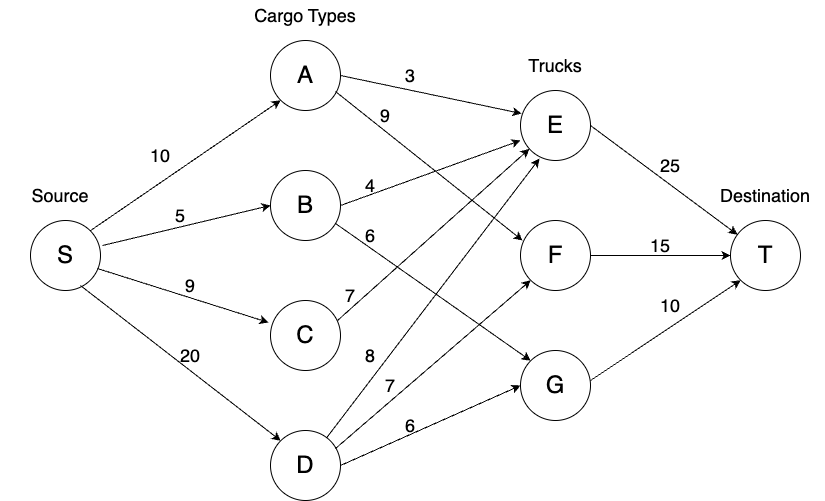

Let us run Ford Fulkerson Algorithm on the residual graph above

Augmenting Paths from S to T printed below using code-

Max Flow found = 42

In [47]:
# building residual graph
arr = {'S':{'S':0,'A':10,'B':5,'C':9,'D':20,'E':0,'F':0,'G':0,'T':0},
       'A':{'S':0,'A':0,'B':0,'C':0,'D':0,'E':3,'F':9,'G':0,'T':0},
       'B':{'S':0,'A':0,'B':0,'C':0,'D':0,'E':4,'F':0,'G':6,'T':0},
       'C':{'S':0,'A':0,'B':0,'C':0,'D':0,'E':7,'F':0,'G':0,'T':0},
       'D':{'S':0,'A':0,'B':0,'C':0,'D':0,'E':8,'F':7,'G':6,'T':0},
       'E':{'S':0,'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'T':25},
       'F':{'S':0,'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'T':15},
       'G':{'S':0,'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'T':10},
       'T':{'S':0,'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'T':0}}

# using array to mark if a node has been visited previously during dfs to avoid infinite recursion situations
visited = {'S': False,'A': False, 'B': False, 'C': False, 'D': False, 'E': False, 'F': False, 'G': False, 'T': False}

def dfs(V,e):
    if V == 'T':
        print("T found while executing dfs!")
        return [V], e
    for vertex in arr[V]:
        # print(arr[V][edge])
        if arr[V][vertex] > 0 and visited[vertex] == False:
            visited[vertex] = True
            val,e1 = dfs(vertex,arr[V][vertex])
            if val != None:
                val.insert(0,V)
                return val,min(e,e1)
        # if no way forward found
        if vertex == 'T':
            return None,e

maxflow = 0
path,minflow = dfs('S',float('inf'))

while(path != None):
    print(path)
    maxflow += minflow
    while len(path)>=2:
        src = path[0]
        dest = path[1]
        path.pop(0)
        arr[src][dest] -= minflow
        arr[dest][src] += minflow

    # reset visited
    for vertex in visited:
        visited[vertex] = False
    path, minflow = dfs('S',float('inf'))
else:
    print("No more paths found to T!")

print("Max Flow:", maxflow)

T found while executing dfs!
['S', 'A', 'E', 'T']
T found while executing dfs!
['S', 'A', 'S', 'B', 'E', 'T']
T found while executing dfs!
['S', 'A', 'S', 'B', 'E', 'T']
T found while executing dfs!
['S', 'A', 'S', 'B', 'G', 'T']
T found while executing dfs!
['S', 'A', 'S', 'C', 'E', 'B', 'G', 'T']
T found while executing dfs!
['S', 'A', 'S', 'C', 'E', 'B', 'G', 'T']
T found while executing dfs!
['S', 'A', 'S', 'C', 'E', 'T']
T found while executing dfs!
['S', 'A', 'S', 'D', 'E', 'T']
T found while executing dfs!
['S', 'A', 'S', 'D', 'E', 'T']
T found while executing dfs!
['S', 'A', 'S', 'D', 'E', 'T']
T found while executing dfs!
['S', 'A', 'S', 'D', 'F', 'T']
T found while executing dfs!
['S', 'A', 'S', 'D', 'F', 'T']
T found while executing dfs!
['S', 'A', 'S', 'D', 'F', 'T']
T found while executing dfs!
['S', 'A', 'S', 'D', 'G', 'B', 'E', 'T']
T found while executing dfs!
['S', 'A', 'S', 'D', 'G', 'B', 'E', 'T']
T found while executing dfs!
['S', 'A', 'S', 'D', 'G', 'T']
T found wh

    Q6

    For each of the following recurrences, determine whether the Master Theorem can be applied, and if so, provide an expression for the runtime
    T(n). If the Master Theorem does not apply, please specify the reason.

i. T(n) = 4T(n/2) + n^3logn  
ii. T(n) = 2T(n/2) + n^0.75  
iii. T(n) = 0.1T(n/4) + logn  
iv. T(n) = 9T(n/3) - n^2  
v. T(n) = n^2T(n/2) + n  
vi. T(n) = 3T(n/3) + n/2  

Solution:
Master theorem  
The master theorem provides a solution in asymptotic terms (using Big O notation) for recurrence relations of types that occur in the analysis of many divide and conquer algorithms.  
The master theorem bounds asymptotically recurrence relations of the following form:  
T(n) = aT(n/b) + f(n), where a>=1 and b>1,  
Then T(n) can be classified as one of four forms to determine asymptotic bounds as follows:  
A. n^(log(base b)(a)) is polynomially larger than f(n) then T(n) = Big Theta(n^(log(base b)(a)))  
B. f(n) and n^(log(base b)(a))log^k(n) are same size then T(n) = Big Theta(n^(log(base b)(a))log^(k+1)(n))  
C. f(n) is polynomially larger than n^(log(base b)(a)) then T(n) = Big Theta(f(n))  
D. The master theorem does not apply.  

i. T(n) = 4T(n/2) + n^3logn
A = 4, B = 2  
log(base 2) 4 = 2  
Case 3  
T(n) = Big Theta (n^3logn)  

ii. T(n) = 2T(n/2) + n^0.75
A = 2, B = 2  
log(base 2) 2 = 1   
Case 1  
T(n) = Big Theta (n)  

iii. T(n) = 0.1T(n/4) + logn  
Master Theorem doesn't apply because A<1  

iv. T(n) = 9T(n/3) - n^2  
Master Theorem doesn't apply because f(n)=-n^2 and that is not asymptotically positive  

v. T(n) = n^2T(n/2) + n  
Master Theorem doesn't apply because A is not a constant value  

vi. T(n) = 3T(n/3) + n/2  
A = 3, B = 3, k = 0  
log(base3) 3 = 1  
Case 2  
T(n) = Big Theta (nlogn)  

    Q7

    A roofer is climbing a ladder. It has n rungs from top to bottom.
    Each time you can either climb 1 or 2 rungs. In how many distinct ways can you climb to the top of the ladder from the bottom?

Solution:
Since expanding the problem space does not change the solution to the smaller problem, this problem has optimal substructure. Hence we can use dynamic programming to solve this.

Base Case:  
If n = 1, there is only 1 rung in the ladder. There is only 1 way to climb this ladder and that is by climbing 1 rung.  
If n = 2, there are 2 rungs in the ladder. There are 2 ways to climb this ladder. Either you climb 1 rung twice, or you climb 1 rung once.  

Dynamic programming:
For 1 <= i <= n, let us calculate the number of ways to climb a ladder of i.  

Let us make an array dp[n] in which dp[i] is the number of distinct ways you can climb a ladder of i rungs.

Either the ith rung is reached by climbing 1 rung from the previous rung or 2 rungs from the previous time.  
1) In case the ith rung is reached by climbing 1 rung from the i-1th rung, the number of ways to climb this ladder is equal to the number of ways to climb a ladder of i-1 rungs.  
2) In case the ith rung is reached by climbing 2 rungs from the i-2th rung, the number of ways to climb this ladder is equal to the number of ways to climb a ladder of i-2 rungs.  

Hence the number of distinct ways to reach the ith rung in a ladder is the sum of the above two cases.  
dp[i] = dp[i-1] + dp[i-2]  

Pseudocode:  
```python
function climbLadder(n):  
    create empty array dp of size n and initialized to 0  
    dp[0] = 1  
    # handling case where n = 1, we cannot assume that dp[1] exists  
    if n>1:  
        dp[1] = 2  
        # filling up array dp from i = 2 to n  
        for i from 2 to n:  
            dp[i] = dp[i-1] + dp[i-2]  
    # number of distinct ways to climb ladder of n rungs is dp[n-1] (because of 0 index of array)  
    return dp[n-1]  
```

In [48]:
n = 5
dp = [0]*n
dp[0] = 1
if n>1:
    dp[1] = 2
    for i in range(2, n):
        dp[i] = dp[i-1] + dp[i-2]
print("Number of distinct ways to climb a ladder of",n,"rungs is",dp[n-1])

Number of distinct ways to climb a ladder of 5 rungs is 8
